In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Day 1. Tensor Basics!

In [ ]:
a = torch.empty(1) # scalar value, value not initialized yet
a

tensor([-2.8021e+24])

In [5]:
a = torch.empty([2, 3])
a

tensor([[-1.3619e-11,  3.3906e-41,  0.0000e+00],
        [ 0.0000e+00,  4.4842e-44,  0.0000e+00]])

In [15]:
a = torch.empty([3,])
a

tensor([-5.7604e-19,  3.3906e-41,  0.0000e+00])

In [16]:
b = torch.rand([2, 2])
b

tensor([[0.5007, 0.1833],
        [0.3618, 0.1794]])

In [18]:
b = torch.ones(2, 2)
b

tensor([[1., 1.],
        [1., 1.]])

In [22]:
c = torch.zeros([2, 3], dtype=torch.int)
c.dtype

torch.int32

In [29]:
arr = [2, 3, 1, 45]
a = torch.tensor(arr)
a

tensor([ 2,  3,  1, 45])

In [30]:
x = torch.rand([2, 2])
y = torch.rand([2, 2])
x, y

(tensor([[0.2318, 0.7052],
         [0.0594, 0.2370]]),
 tensor([[0.5762, 0.2044],
         [0.7939, 0.4198]]))

In [ ]:
x + y
torch.add(x, y)  # torch.add_(x, y)

x - y
torch.sub(x, y)  # torch.sub_(x, y)

x / y
torch.div(x, y)  # torch.div_(x, y)

x * y
torch.mul(x, y)  # torch.mul_(x, y)

tensor([[0.8080, 0.9097],
        [0.8533, 0.6567]])

In [32]:
x - y + y

tensor([[0.2318, 0.7052],
        [0.0594, 0.2370]])

In [33]:
x + y / 2

tensor([[0.5199, 0.8074],
        [0.4564, 0.4469]])

In [35]:
x[0]

tensor([0.2318, 0.7052])

In [37]:
torch.dot(x[0], y[0])

tensor(0.2777)

In [40]:
x.add(2)

tensor([[4.2318, 4.7052],
        [4.0594, 4.2370]])

In [39]:
x.add_(2) #inplace
x

tensor([[2.2318, 2.7052],
        [2.0594, 2.2370]])

In [42]:
x = torch.rand([5, 3])
x

tensor([[0.8963, 0.7810, 0.8243],
        [0.8946, 0.7171, 0.3172],
        [0.4631, 0.7369, 0.5892],
        [0.7482, 0.0369, 0.3502],
        [0.7531, 0.4460, 0.5883]])

In [44]:
x[1, :]

tensor([0.8946, 0.7171, 0.3172])

In [46]:
x[1, 1].item()

0.717079758644104

In [ ]:
# Reshaping

x = torch.rand([4, 4])
x

tensor([[0.9119, 0.7043, 0.9700, 0.1690],
        [0.6645, 0.0896, 0.1956, 0.5659],
        [0.0253, 0.2843, 0.8194, 0.0467],
        [0.9689, 0.4883, 0.2676, 0.0160]])

In [ ]:
x.view([8, -1])
# 8 by 2

tensor([[0.9119, 0.7043],
        [0.9700, 0.1690],
        [0.6645, 0.0896],
        [0.1956, 0.5659],
        [0.0253, 0.2843],
        [0.8194, 0.0467],
        [0.9689, 0.4883],
        [0.2676, 0.0160]])

In [ ]:
x.view([-1, 8])
# 2 by 8

tensor([[0.9119, 0.7043, 0.9700, 0.1690, 0.6645, 0.0896, 0.1956, 0.5659],
        [0.0253, 0.2843, 0.8194, 0.0467, 0.9689, 0.4883, 0.2676, 0.0160]])

In [53]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [ ]:
a.numpy()

array([1., 1., 1., 1., 1.], dtype=float32)

In [ ]:
a

tensor([1., 1., 1., 1., 1.])

In [57]:
b = np.random.randint(2, 10, 10)
b

array([2, 7, 7, 4, 4, 6, 8, 4, 7, 9])

In [66]:
#b = torch.from_numpy(b)
b = b.to(torch.float16)

In [ ]:
b

# We can use tensors only on CPU, and if we moved tensor into GPU we can't come it back

tensor([2., 7., 7., 4., 4., 6., 8., 4., 7., 9.], dtype=torch.float16)

# Autograd. Calculating gradieents

In [69]:
x = torch.randn(3, requires_grad=True)
x

tensor([-1.0930, -1.9463, -0.3726], requires_grad=True)

In [70]:
y = x + 2
y

tensor([0.9070, 0.0537, 1.6274], grad_fn=<AddBackward0>)

In [71]:
z = y * y * 2
z

tensor([1.6453, 0.0058, 5.2969], grad_fn=<MulBackward0>)

In [72]:
z = z.mean()
z

tensor(2.3160, grad_fn=<MeanBackward0>)

In [73]:
z.backward() # dz / dx

In [74]:
x.grad

tensor([1.2093, 0.0715, 2.1699])

In [81]:
x = torch.randn(3, requires_grad=True)
print(x)

y = x + 2
print(y)
z = y * y * 2
# z = z.mean()
print(z)

v = torch.tensor([.1, 1., .001], dtype=torch.float32)

z.backward(v)
# print(x.grad)


# clearing grads

x.requires_grad_(False)
print(x)
# x.detach() # create a new tensor without grads
# with torch.no_grad():

tensor([-0.8242, -0.3202, -0.9756], requires_grad=True)
tensor([1.1758, 1.6798, 1.0244], grad_fn=<AddBackward0>)
tensor([2.7652, 5.6434, 2.0986], grad_fn=<MulBackward0>)
tensor([-0.8242, -0.3202, -0.9756])


In [86]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    model_output = (weights * 3).sum()
    
    model_output.backward()
    print(weights.grad)
    
    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


# Backprop

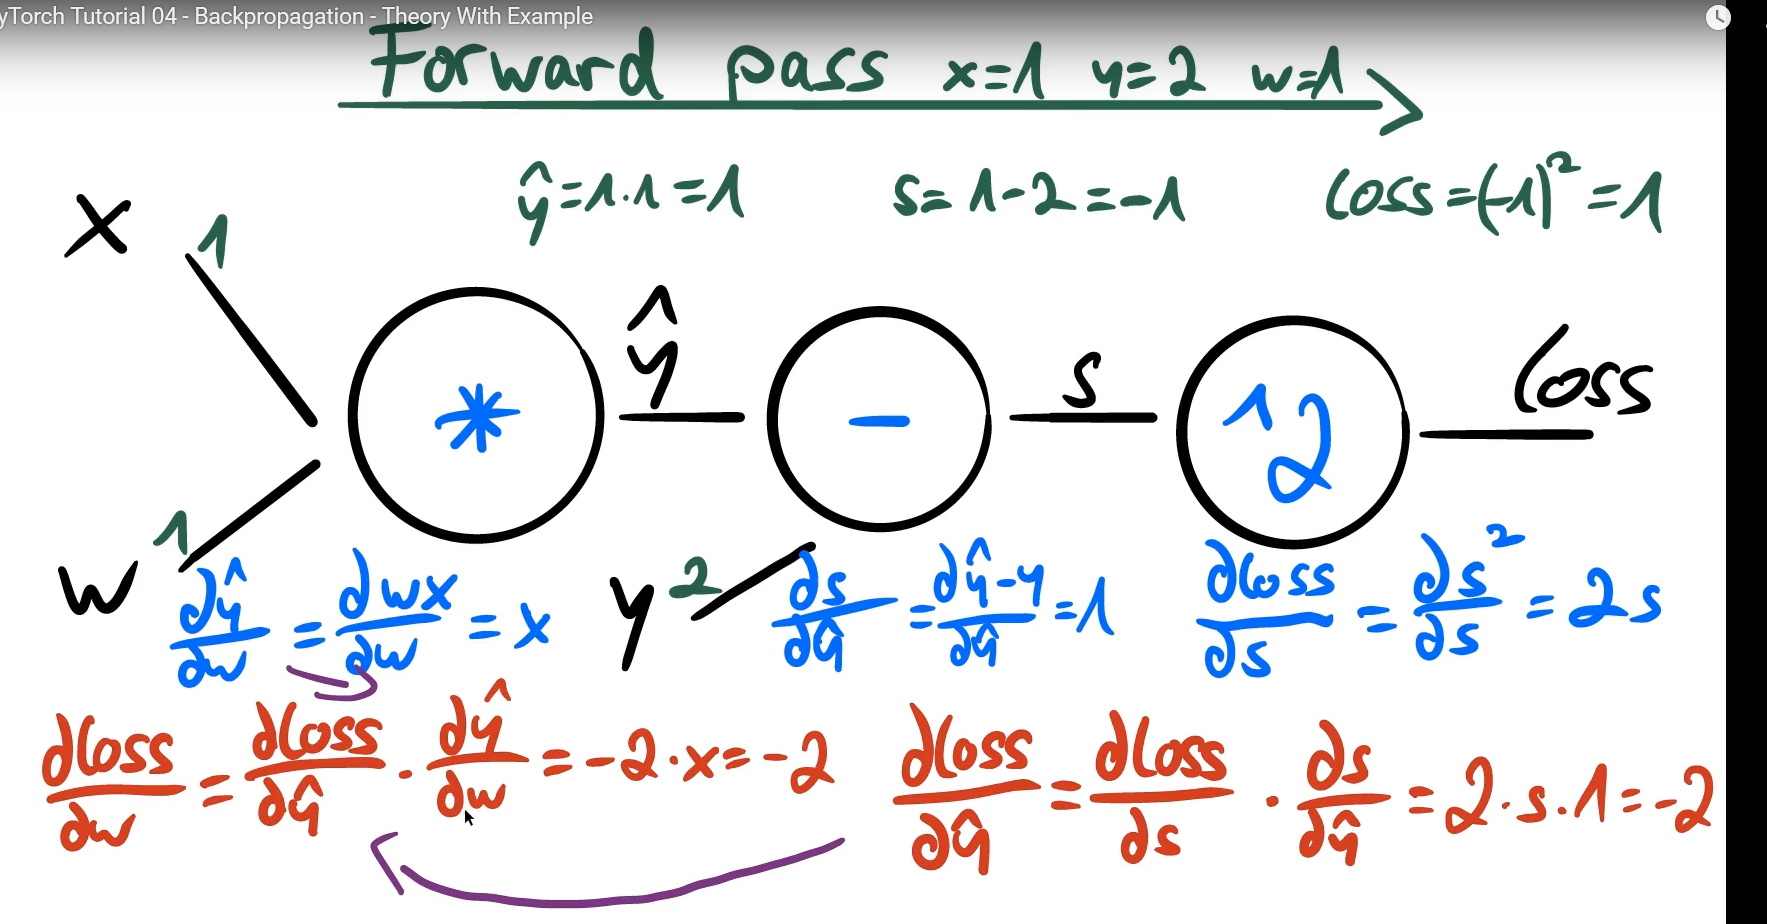

In [ ]:
# x = 1.0, y = 2.0, w = 1.0

x = torch.tensor(1.0)
y = torch.tensor(2.)

w = torch.tensor(1.0, requires_grad=True)

# forward pass and compute the loss

y_hat = w * x     # 1
loss = (y_hat - y) ** 2    # (1 - 2) ** 2 = 1

# loss = 1
print(loss)

# backward pass (pytorch will automaticly compute grad for us)
loss.backward()     # whole gradient computation
print(w.grad) # dloss / dw


### update weights 
### next forward pass and backwards

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


# Gradient Descent with Autograd and Backpropagation

In [22]:
# Step 1. Manually
# f = w * x | w = 2
# f = 2 * x

X = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

# model prediction

# forward pass
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y) ** 2).mean()


# gradient
# MSE = 1/n * (w*x - y)^2
# dJ/dw = 1/n 2*(w*x - y)

def gradient(x, y, y_pred):
    return np.dot(2*x, y_pred-y).mean()

print(f'Pred before training: f(5) = {forward(5):.3f}')

#Training 
learning_rate = .01
n_iters = 15

for epoch in range(n_iters):
    
    #prediction = forward_pwass
    y_pred = forward(X)
    
    # loss
    l = loss(y, y_pred)

    # gradients
    dw = gradient(X, y, y_pred)
    
    # update our date
    w -= learning_rate * dw
    
    
    if epoch % 1 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss={l:.8f}')    
        
print(f'Pred after training: f(5) = {forward(5):.3f}')

Pred before training: f(5) = 0.000
epoch 1: w = 1.200, loss=30.00000000
epoch 2: w = 1.680, loss=4.80000067
epoch 3: w = 1.872, loss=0.76800019
epoch 4: w = 1.949, loss=0.12288000
epoch 5: w = 1.980, loss=0.01966083
epoch 6: w = 1.992, loss=0.00314574
epoch 7: w = 1.997, loss=0.00050332
epoch 8: w = 1.999, loss=0.00008053
epoch 9: w = 1.999, loss=0.00001288
epoch 10: w = 2.000, loss=0.00000206
epoch 11: w = 2.000, loss=0.00000033
epoch 12: w = 2.000, loss=0.00000005
epoch 13: w = 2.000, loss=0.00000001
epoch 14: w = 2.000, loss=0.00000000
epoch 15: w = 2.000, loss=0.00000000
Pred after training: f(5) = 10.000


In [25]:
# Step 2. Compute gradient automatically
# f = w * x | w = 2
# f = 2 * x

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction

# forward pass
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y) ** 2).mean()


# gradient
# MSE = 1/n * (w*x - y)^2
# dJ/dw = 1/n 2*(w*x - y)

def gradient(x, y, y_pred):
    return np.dot(2*x, y_pred-y).mean()

print(f'Pred before training: f(5) = {forward(5):.3f}')

#Training 
learning_rate = .01
n_iters = 1000

for epoch in range(n_iters):
    
    #prediction = forward_pwass
    y_pred = forward(X)
    
    # loss
    l = loss(y, y_pred)

    # # gradients
    # dw = gradient(X, y, y_pred)
    l.backward() # dl/dw
    
    # # update our date
    # w -= learning_rate * dw
    
    # update weights
    with torch.no_grad():
        w -= learning_rate * w.grad  
    
    # set grad to zero
    w.grad.zero_()
    
    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss={l:.8f}')    
        
print(f'Pred after training: f(5) = {forward(5):.3f}')

Pred before training: f(5) = 0.000
epoch 1: w = 0.300, loss=30.00000000
epoch 11: w = 1.665, loss=1.16278565
epoch 21: w = 1.934, loss=0.04506890
epoch 31: w = 1.987, loss=0.00174685
epoch 41: w = 1.997, loss=0.00006770
epoch 51: w = 1.999, loss=0.00000262
epoch 61: w = 2.000, loss=0.00000010
epoch 71: w = 2.000, loss=0.00000000
epoch 81: w = 2.000, loss=0.00000000
epoch 91: w = 2.000, loss=0.00000000
epoch 101: w = 2.000, loss=0.00000000
epoch 111: w = 2.000, loss=0.00000000
epoch 121: w = 2.000, loss=0.00000000
epoch 131: w = 2.000, loss=0.00000000
epoch 141: w = 2.000, loss=0.00000000
epoch 151: w = 2.000, loss=0.00000000
epoch 161: w = 2.000, loss=0.00000000
epoch 171: w = 2.000, loss=0.00000000
epoch 181: w = 2.000, loss=0.00000000
epoch 191: w = 2.000, loss=0.00000000
epoch 201: w = 2.000, loss=0.00000000
epoch 211: w = 2.000, loss=0.00000000
epoch 221: w = 2.000, loss=0.00000000
epoch 231: w = 2.000, loss=0.00000000
epoch 241: w = 2.000, loss=0.00000000
epoch 251: w = 2.000, los

## Model creating pipeline 

* 1) Design a model (input, output size, forward pass)
* 2) Design loss and optimizer
* 3) Training loop
*   - forward pass: compute prediction
*   - backward pass: gradients
*   - update weights 

In [ ]:
# 1) Design a model (input, output size, forward pass)
# 2) Design loss and optimizer
# 3) Training loop
#   - forward pass: compute prediction
#   - backward pass: gradients
#   - update weights 







# Step 3. Compute gradient and loss automatically, also use optimizer
# f = w * x | w = 2
# f = 2 * x

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction

# forward pass
def forward(x):
    return w * x

# Look for loss code
# loss = MSE
# def loss(y, y_pred):
#     return ((y_pred - y) ** 2).mean()


# gradient
# MSE = 1/n * (w*x - y)^2
# dJ/dw = 1/n 2*(w*x - y)

# def gradient(x, y, y_pred):
#     return np.dot(2*x, y_pred-y).mean()

print(f'Pred before training: f(5) = {forward(5):.3f}')

#Training 
learning_rate = .01
n_iters = 100

# loss here now
loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)

for epoch in range(n_iters):
    
    #prediction = forward_pwass
    y_pred = forward(X)
    
    # loss
    l = loss(y, y_pred)

    # # gradients
    # dw = gradient(X, y, y_pred)
    l.backward() # dl/dw
    
    # # update our date
    # w -= learning_rate * dw
    
    # update weights
    # with torch.no_grad():
    #     w -= learning_rate * w.grad  
    optimizer.step()
    
    # set grad to zero
    # w.grad.zero_()
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss={l:.8f}')    
        
print(f'Pred after training: f(5) = {forward(5):.3f}')

Pred before training: f(5) = 0.000
epoch 1: w = 0.300, loss=30.00000000
epoch 11: w = 1.665, loss=1.16278565
epoch 21: w = 1.934, loss=0.04506890
epoch 31: w = 1.987, loss=0.00174685
epoch 41: w = 1.997, loss=0.00006770
epoch 51: w = 1.999, loss=0.00000262
epoch 61: w = 2.000, loss=0.00000010
epoch 71: w = 2.000, loss=0.00000000
epoch 81: w = 2.000, loss=0.00000000
epoch 91: w = 2.000, loss=0.00000000
Pred after training: f(5) = 10.000


In [ ]:
# 1) Design a model (input, output size, forward pass)
# 2) Design loss and optimizer
# 3) Training loop
#   - forward pass: compute prediction
#   - backward pass: gradients
#   - update weights 







# Step 4. Compute full automatically
# f = w * x | w = 2
# f = 2 * x

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

x_test = torch.tensor([5], dtype=torch.float32)

# w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# # model prediction

# # forward pass
# def forward(x):
#     return w * x

# Look for loss code
# loss = MSE
# def loss(y, y_pred):
#     return ((y_pred - y) ** 2).mean()


# gradient
# MSE = 1/n * (w*x - y)^2
# dJ/dw = 1/n 2*(w*x - y)

# def gradient(x, y, y_pred):
#     return np.dot(2*x, y_pred-y).mean()

print(f'Pred before training: f(5) = {model(x_test):.3f}')

#Training 
learning_rate = .01
n_iters = 100

# loss here now
loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)

for epoch in range(n_iters):
    
    #prediction = forward_pwass
    y_pred = forward(X)
    
    # loss
    l = loss(y, y_pred)

    # # gradients
    # dw = gradient(X, y, y_pred)
    l.backward() # dl/dw
    
    # # update our date
    # w -= learning_rate * dw
    
    # update weights
    # with torch.no_grad():
    #     w -= learning_rate * w.grad  
    optimizer.step()
    
    # set grad to zero
    # w.grad.zero_()
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss={l:.8f}')    
        
print(f'Pred after training: f(5) = {model(x_test):.3f}')

4 1


TypeError: Linear.__init__() missing 2 required positional arguments: 'in_features' and 'out_features'

In [34]:
_x = torch.sigmoid(torch.tensor(np.dot([1, 2, 3, 4], 0.0))).numpy()
_x
# torch.tensor(np.dot([1, 2, 3, 4], 0.0))

array([0.5, 0.5, 0.5, 0.5])

In [ ]:
np.clip()

In [48]:
X = np.array([1, 2, 3, 4])
y = np.array([0, 0, 1, 1])

w = 0.0

def forward(x):
    return 1 / (1 + np.exp(-x * w))

def loss(y, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1-epsilon)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# dL/dw
def gradient(x, y, y_pred):
    return np.dot(x, y_pred - y).mean()


learning_rate = .1
n_iters = 100

print(f'Pred before training: f(5) = {forward(5):.3f}')

for epoch in range(n_iters):
    
    y_pred = forward(X)
    l = loss(y, y_pred)
    dw = gradient(X, y, y_pred)
    w -= learning_rate * dw
    
    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss={l:.8f}')    
        
print(f'Pred after training: f(5) = {forward(5):.3f}')

Pred before training: f(5) = 0.500
epoch 1: w = 0.200, loss=0.69314718
epoch 11: w = 0.288, loss=0.62395775
epoch 21: w = 0.288, loss=0.62395775
epoch 31: w = 0.288, loss=0.62395775
epoch 41: w = 0.288, loss=0.62395775
epoch 51: w = 0.288, loss=0.62395775
epoch 61: w = 0.288, loss=0.62395775
epoch 71: w = 0.288, loss=0.62395775
epoch 81: w = 0.288, loss=0.62395775
epoch 91: w = 0.288, loss=0.62395775
Pred after training: f(5) = 0.808


Pred before training: f(5) = 0.500
epoch 1: w = 0.050, loss = 0.69314718
epoch 11: w = 0.247, loss = 0.62574923
epoch 21: w = 0.280, loss = 0.62402282
epoch 31: w = 0.286, loss = 0.62396028
epoch 41: w = 0.287, loss = 0.62395785
epoch 51: w = 0.288, loss = 0.62395776
epoch 61: w = 0.288, loss = 0.62395775
epoch 71: w = 0.288, loss = 0.62395775
epoch 81: w = 0.288, loss = 0.62395775
epoch 91: w = 0.288, loss = 0.62395775
Pred after training: f(5) = 0.808
